In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

Bu alıştırmada, modelinizi kullanarak konut fiyatlarını tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

1.  Fiyatları verilerini Kaggle'dan indirin.
2. Verilerinizi eğitim ve test kümelerine ayırın.
3. Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.
4. Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
5. Modelinizin performansı tatmin edici mi? Açıklayın.
6. Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [2]:
ev_fiyatlari = pd.read_csv('data/train.csv')

In [3]:
Y = ev_fiyatlari['SalePrice']

X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [5]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     381.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:06:25   Log-Likelihood:                -14016.
No. Observations:                1168   AIC:                         2.805e+04
Df Residuals:                    1157   BIC:                         2.811e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.145e+06    1.5e+05     -7.639      0.000   -1.44e+06   -8.51e+05
YearBuilt      253.8041     59.471      4.268      0.000     137.120     370.488
TotRmsAbvGrd  -271.7309   1284.863     -0.211      0.833   -2792.654    2249.192
FullBath     -5857.2516   3151.436     -1.859      0.063    -1.2e+04     325.918
1stFlrSF        12.5536      5.661      2.218      0.027       1.447      23.660
TotalBsmtSF     17.8191      4.869      3.660      0.000       8.267      27.372
GarageArea      11.3850     12.103      0.941      0.347     -12.362      35.132
GarageCars    1.165e+04   3534.404      3.297      0.001    4717.013    1.86e+04
GrLivArea       49.5656      4.962      9.990      0.000      39.831      59.300
OverallQual   2.114e+04   1382.101     15.296      0.000    1.84e+04    2.39e+04
YearRemodAdd   289.1070     74.989      3.855      0.000     141.977     436.237
==============================================================================
Omnibus:                      365.424   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40253.872
Skew:                          -0.319   Prob(JB):                         0.00
Kurtosis:                      31.753   Cond. No.                     4.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

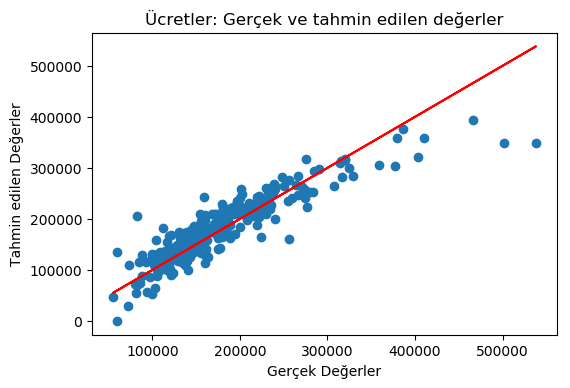

In [6]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()


Modelimizdeki tahminlerin 300000 fiyatindan sonra cok da iyi tahmin edilmedigini goruyoruz. Bunun nedeni kullandigimiz degiskenlerin yetersizliginden kaynaklaniyor olabilir. 

In [7]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 22223.43688764321
Ortalama Kare Hata (MSE)          : 951225763.9630529
Kök Ortalama Kare Hata (RMSE)     : 30841.948122047233
Ortalama Mutlak Yüzde Hata (MAPE) : 14.034090768334723


In [8]:
Y = ev_fiyatlari['SalePrice']

X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [9]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print ('Degiskenler: \n', lrm.coef_)
print ('sabir Deger (Bias): \n ', lrm.intercept_)

Degiskenler: 
 [ 2.68240707e+02  3.31050771e+01 -6.79087146e+03  1.41737355e+01
  1.98650991e+01  1.49475334e+01  1.04179010e+04  5.12971178e+01
  1.96045898e+04  2.96481161e+02]
sabir Deger (Bias): 
  -1186193.7666661674


In [11]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:06:26   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
Y2 = ev_fiyatlari['SalePrice']

X2 = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
                  'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd', 'Fireplaces',
                  'BsmtFinSF1', 'WoodDeckSF','2ndFlrSF', 'OpenPorchSF', 'HalfBath']]

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X2_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X2_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [14]:
X2_train = sm.add_constant(X2_train)

sonuclar = sm.OLS(y2_train, X2_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:06:26   Log-Likelihood:                -13983.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1151   BIC:                         2.809e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.063e+06   1.56e+05     -6.826      0.000   -1.37e+06   -7.57e+05
YearBuilt      178.9098     63.385      2.823      0.005      54.546     303.273
TotRmsAbvGrd  1394.8076   1270.355      1.098      0.272   -1097.663    3887.278
FullBath     -1141.8635   3368.702     -0.339      0.735   -7751.348    5467.622
1stFlrSF        21.2083     24.102      0.880      0.379     -26.081      68.498
TotalBsmtSF     10.9937      4.952      2.220      0.027       1.277      20.710
GarageArea       8.8197     11.980      0.736      0.462     -14.685      32.325
GarageCars    1.189e+04   3493.667      3.402      0.001    5032.311    1.87e+04
GrLivArea       24.7893     23.625      1.049      0.294     -21.563      71.142
OverallQual   2.071e+04   1373.102     15.081      0.000     1.8e+04    2.34e+04
YearRemodAdd   321.8342     73.934      4.353      0.000     176.774     466.895
Fireplaces    7355.3796   2151.020      3.419      0.001    3135.019    1.16e+04
BsmtFinSF1      17.7149      3.011      5.883      0.000      11.807      23.622
WoodDeckSF      31.4268      9.683      3.246      0.001      12.429      50.425
2ndFlrSF        14.0646     23.806      0.591      0.555     -32.643      60.772
OpenPorchSF      3.4968     18.357      0.190      0.849     -32.520      39.514
HalfBath       309.0577   3288.479      0.094      0.925   -6143.028    6761.144
==============================================================================
Omnibus:                      426.007   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61226.490
Skew:                          -0.563   Prob(JB):                         0.00
Kurtosis:                      38.452   Cond. No.                     5.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

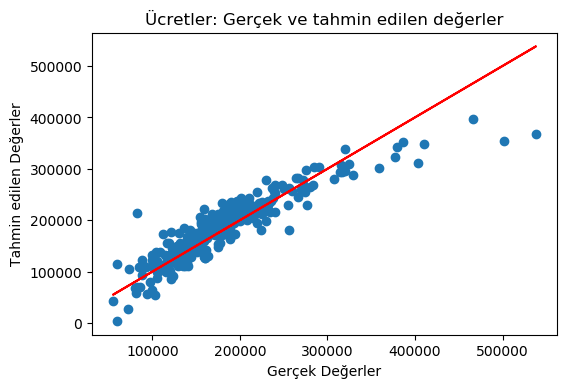

In [15]:
X2_test = sm.add_constant(X2_test)
y2_preds = sonuclar.predict(X2_test)

plt.figure(dpi = 100)

plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()




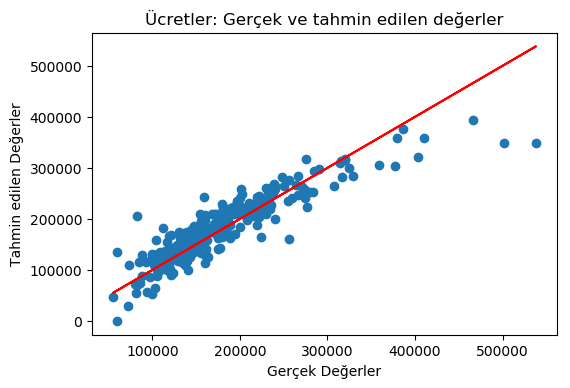

In [16]:
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()

Eklenen degiskenler tahminde bir iyilesme saglayamamistir. 